## 线性回归手动实现
### 1.用 NumPy 生成数据：y = 3x + 5 + noise
### 2.手动推导最小二乘法公式
### 3.用 NumPy 实现解析解!
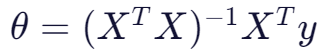
### 4.画出原始数据点 + 拟合直线
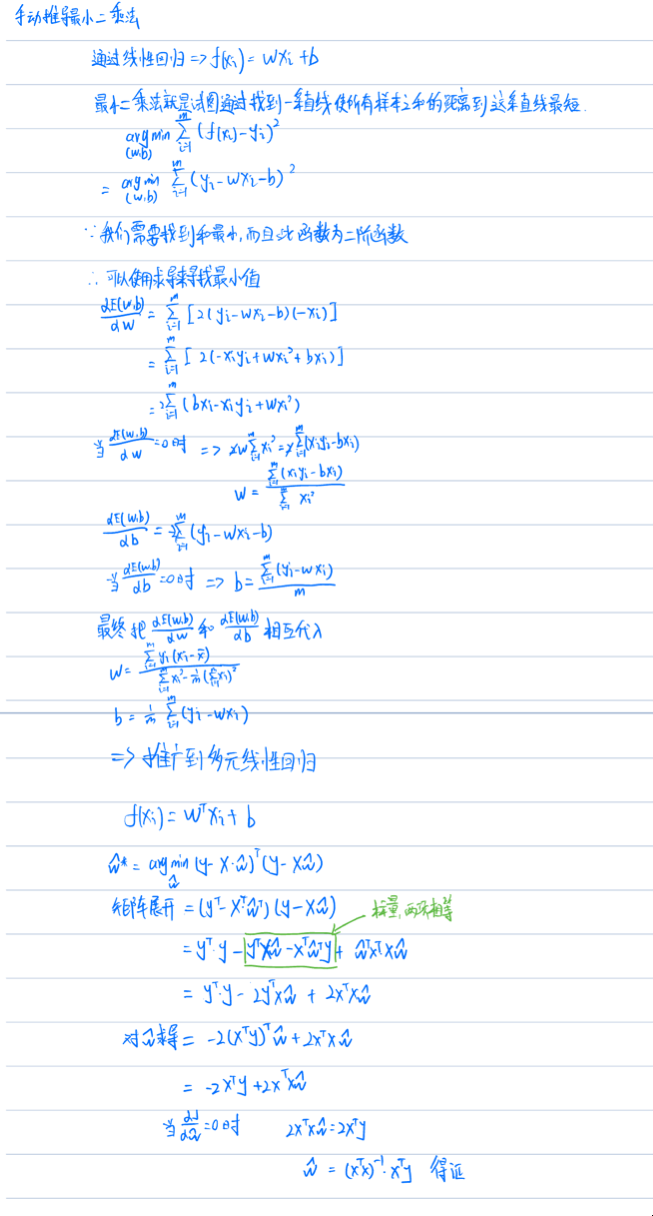

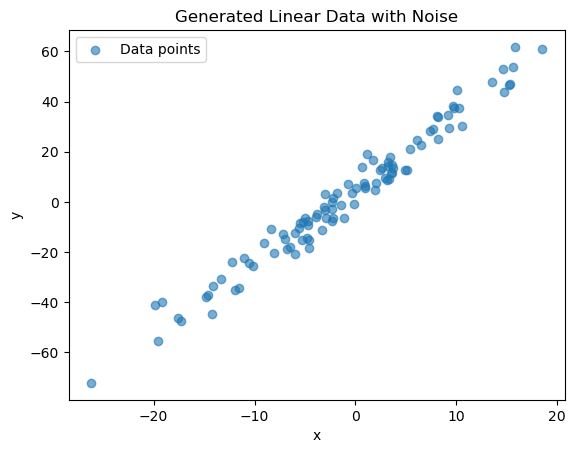

真实参数: w=3.0, b=5.0
预测参数: w=2.928, b=5.037


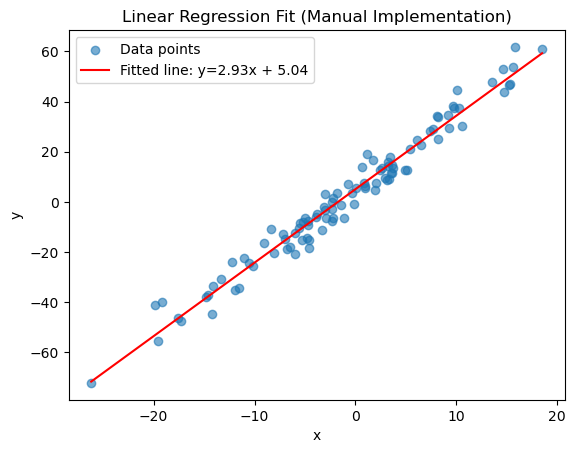

In [4]:
# 第1天：线性回归手动实现（使用 NumPy）
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成带噪声的线性数据
np.random.seed(42)  # 保证结果可复现
n_samples = 100
X = np.random.randn(n_samples, 1) * 10  # 特征 x，范围大致在 [-30, 30],生成 n_samples*1 维的随机数，且该数服从标准正太分布
true_w = 3.0
true_b = 5.0
noise = np.random.randn(n_samples, 1) * 5  # 噪声
y = true_w * X + true_b + noise  # y = 3x + 5 + noise

# 可视化原始数据
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.title('Generated Linear Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. 准备设计矩阵（添加偏置项：一列全1）
# X_design 的形状应为 (n_samples, 2)，第一列为1（对应偏置b），第二列为x
X_design = np.hstack([np.ones((n_samples, 1)), X])  # 两个矩阵横向进行叠加，np.ones((n_samples, 1))矩阵和X，其中np.ones((n_samples, 1))的意思是生成100行一列的全为1的矩阵

# 3. 手动实现最小二乘法（解析解）
# 公式: theta = (X^T X)^(-1) X^T y
# 注意：y 需要是列向量，形状 (n_samples, 1)
XTX = X_design.T @ X_design
XTy = X_design.T @ y

# 求逆（注意：XTX 必须可逆）
theta = np.linalg.inv(XTX) @ XTy # 其中第一个是截距，后面的数字代表特征对应每个特征的系数

# 提取权重和偏置
w_pred = theta[1, 0]  # 斜率
b_pred = theta[0, 0]  # 截距

print(f"真实参数: w={true_w}, b={true_b}")
print(f"预测参数: w={w_pred:.3f}, b={b_pred:.3f}")

# 4. 可视化拟合结果
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # 去特征的最小值和最大值，在其中间均匀生成100个点，然后生成100*1的向量
y_line = w_pred * x_line + b_pred

plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(x_line, y_line, color='red', label=f'Fitted line: y={w_pred:.2f}x + {b_pred:.2f}')
plt.title('Linear Regression Fit (Manual Implementation)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. 【思考题】尝试以下操作：
# - 如果 n_samples 很小（比如 5），结果会怎样？
# - 如果特征维度很高（比如 50 维），还能用解析解吗？为什么？


/home/jiangchengxuan/anaconda3/envs/d2l/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiangchengxuan/anaconda3/envs/d2l/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiangchengxuan/anaconda3/envs/d2l/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiangchengxuan/anaconda3/envs/d2l/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiangchengxuan/anaconda3/envs/d2l/lib/python3.10/site-

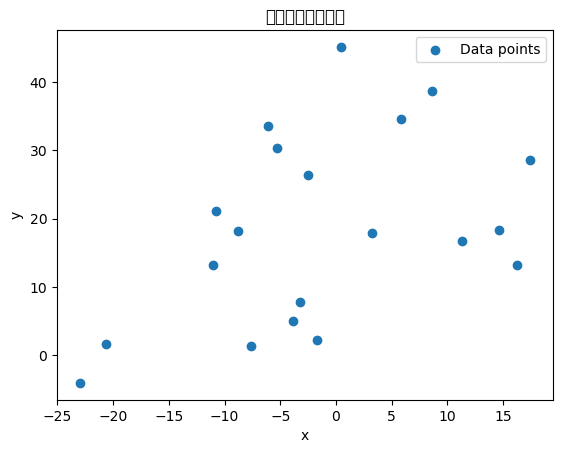

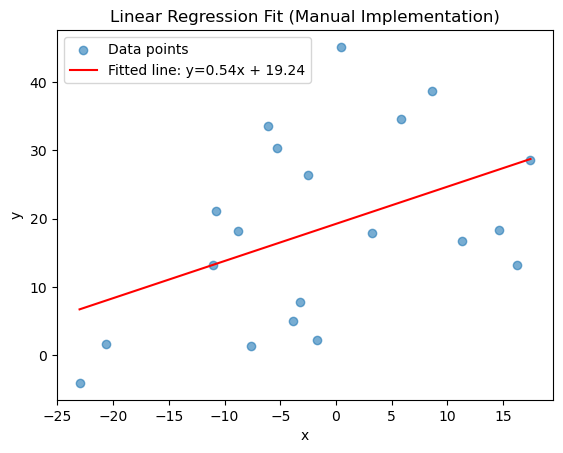

In [5]:
import numpy as np

np.random.seed(1)  # 生成随机数种子
n_samples = 20 # 随机数的数量
X = np.random.randn(n_samples,1)  # 生成服从均值为0标准差为1的标准正太分布
X = X * 10 # 为了可视化所以*10
w = 0.6 # 权重
b = 20.0    # 偏置
noise = np.random.randn(n_samples,1) * 15
y = w * X + b + noise

# 画图
plt.scatter(X, y, alpha=1, label='Data points')   # 将横坐标和纵坐标对应的点绘制在二维平面上，alpha=0.6是点的透明度，label是点的含义
plt.title('带噪声的线性数据')   # 整个图的名称
plt.xlabel('x')    # 横坐标的名称
plt.ylabel('y')    # 纵坐标的名称
plt.legend()    # 解释图中不同元素（如线条、散点、柱状图等）所代表的含义
plt.show()  # 展示图像

X_design = np.hstack([np.ones((n_samples, 1)),X]) # 生成b;w的矩阵

XTX = X_design.T @ X_design
XTy = X_design.T @ y

# 计算矩阵的最小二乘法
theta = np.linalg.inv(XTX) @ XTy

w_pred = theta[1,0]
b_pred = theta[0,0]

# 4. 可视化拟合结果
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # 去特征的最小值和最大值，在其中间均匀生成100个点，然后生成100*1的向量
y_line = w_pred * x_line + b_pred

plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(x_line, y_line, color='red', label=f'Fitted line: y={w_pred:.2f}x + {b_pred:.2f}')
plt.title('Linear Regression Fit (Manual Implementation)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()